Name:
Syeduzzaman Khan

Project Name: Food lover's classification  

# 1. Objectives:

<p style='text-align: justify;'>
University of the Pacific cafeteria has bought several new foods with their existing tasty foods. To introduce new foods with students, UOP needs an automation process to distribute the Coupons campaign to students with coupons that are likely to encourage them to come.

</p>
<p style='text-align: justify;'>
The purpose of this project is to analyze the student questionnaire dataset and help UOP to create a recommendation engine for email coupon campaigns.

</p>

<p style='text-align: justify;'>

To achieve our goals, we have to carefully analyze the dataset considering different perspectives. In the beginning of the project, we will get too familiar with dataset and look into different columns. Then, we will pick the relevant columns that will lead us to reach our goals. The obtained results will be visualized using plot.
</p>


# 2. Data Exploration: 

Read dataset

In [33]:
# import Library 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
 
import pandas as pd
import numpy as np

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline


In [34]:
# read csv file 
df = pd.read_csv("food_coded.csv")

# data cleaning : drop the NA rows 
df=df.dropna()


### Dataframe Type, Dataframe Row & Column:   

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
print("Row: ",df.shape[0])

Row:  52


In [37]:
print("Column: ",df.shape[1])

Column:  61


The dataset has total 52 rows and 61 columns.  

### Counting Gender of students: 


In [38]:
#1 Gender count 
gend = df['Gender'].value_counts()
print(gend)

1    31
2    21
Name: Gender, dtype: int64


The dataset has total 31 Male and 21 female students.  

In [39]:
#2 student weight 
weight=df.weight # create pandas series from dataframe 
weight.describe() # print different aspects of data 

count     52.000000
mean     154.903846
std       43.003082
min        0.000000
25%      136.500000
50%      155.000000
75%      181.250000
max      264.000000
Name: weight, dtype: float64

In [40]:
#3 student recommendation on veggie  
veggies_day=df.veggies_day # create pandas series from dataframe 
veggies_day.describe() # print different aspects of data 

count    52.000000
mean      4.076923
std       1.006764
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: veggies_day, dtype: float64

In [41]:
#4 student recommendation on Indian Food
indian_food=df.indian_food # create pandas series from dataframe 
indian_food.describe() # print different aspects of data 

count    52.000000
mean      2.961538
std       1.481408
min       1.000000
25%       1.750000
50%       3.000000
75%       4.000000
max       5.000000
Name: indian_food, dtype: float64

The above paragraphs show the different aspects of multiple columns of data set. The information includes mean, max, min, and percentiles of the specific columns.

# 3. Dendrogram

Columns selection for the Dendrogram: veggies_day, weight, and indian_food. 

In [43]:
from pandas import DataFrame, Series
Dendrogram_data = df[['indian_food','veggies_day','weight']]
from sklearn.metrics.pairwise import euclidean_distances
Dendrogram_data_D = DataFrame(euclidean_distances(Dendrogram_data))

/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


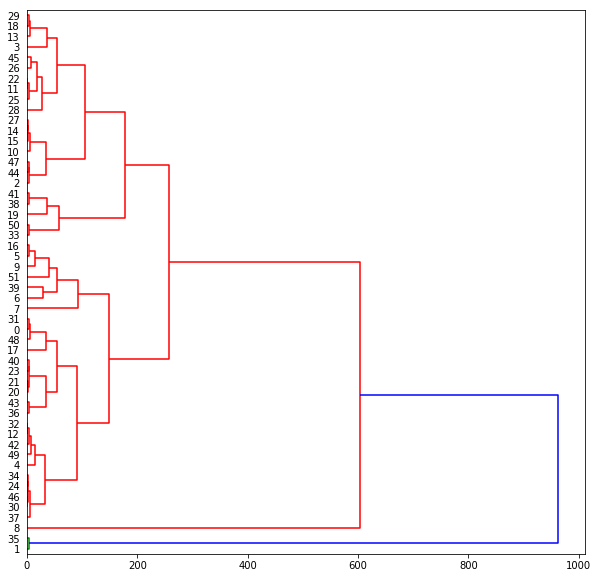

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
Z = linkage(Dendrogram_data_D, 'average')
plt.figure(figsize=(10, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=10)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
The above dendrogram is plotted using the indian food, weight, and veggies_day columns and we can see that it is possible to make 3 to 6 groups. 


# 4. Step-by-step K-means:

#### First iteration

Text(0, 0.5, 'indain food')

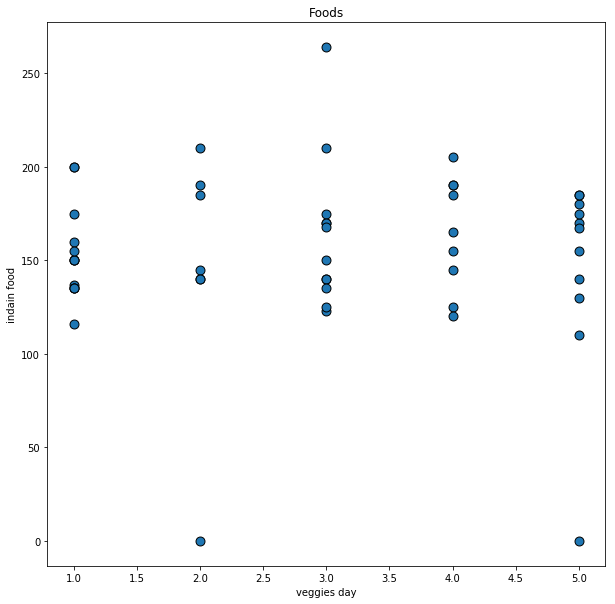

In [45]:
fig = plt.figure(figsize=(10,10))
df2=Dendrogram_data
plt.scatter(Dendrogram_data.indian_food, Dendrogram_data.weight, edgecolor = 'black', s = 80)
plt.title('Foods')
plt.xlabel('veggies day')
plt.ylabel('indain food')

The above plot shows the visual explaniation of our selected columns. 

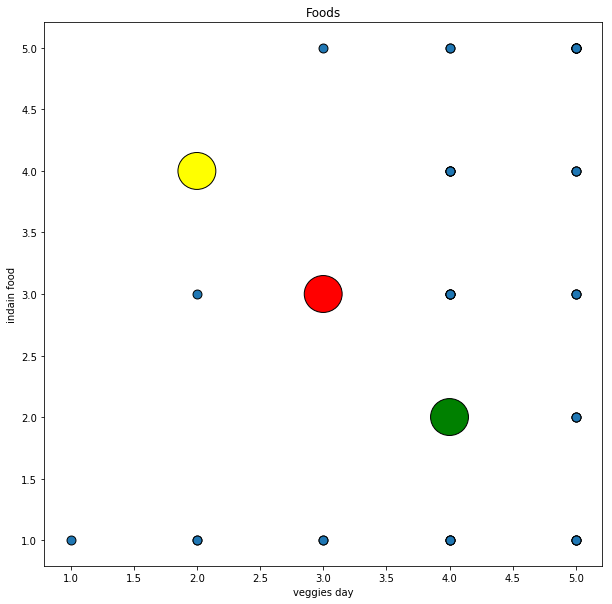

In [46]:
centroid1 = np.array([2,4])
centroid2 = np.array([3, 3])
centroid3 = np.array([4, 2])

fig = plt.figure(figsize=(10,10))
plt.scatter(Dendrogram_data.veggies_day, Dendrogram_data.indian_food, edgecolor = 'black', s = 80)
plt.title('Foods')
plt.xlabel('veggies day')
plt.ylabel('indain food')
circle1 = plt.Circle(centroid1, radius=0.15, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.15, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.15, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

We have used three  random centroid to calculate the distance.

/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Text(0, 0.5, 'indain food')

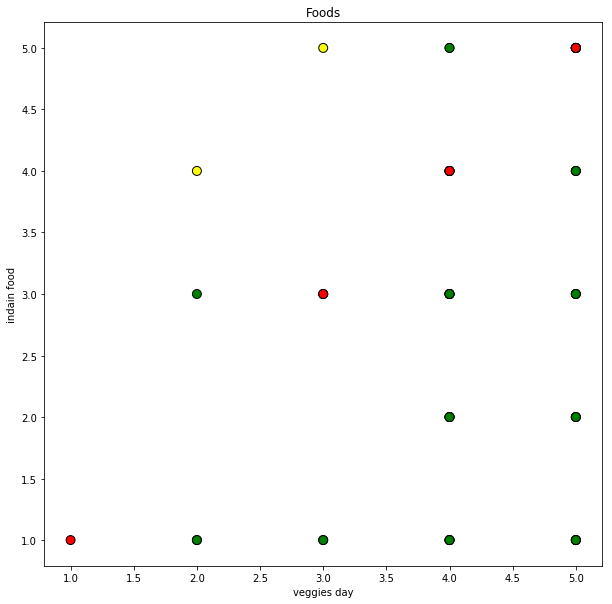

In [47]:
Dendrogram_data["Dist_C1"] = np.sqrt((Dendrogram_data.veggies_day - centroid1[0])**2 
                             + (Dendrogram_data.indian_food - centroid1[1])**2)
Dendrogram_data["Dist_C2"] = np.sqrt((Dendrogram_data.veggies_day - centroid2[0])**2 + 
                             (Dendrogram_data.indian_food - centroid2[1])**2)
Dendrogram_data["Dist_C3"] = np.sqrt((Dendrogram_data.veggies_day - centroid3[0])**2 + 
                             (Dendrogram_data.indian_food - centroid3[1])**2)

Dendrogram_data["Association"] = np.where(
    (Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C2) & 
    (Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C3), 1, 
     np.where((Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C1) & 
    (Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C3) , 2, 3))

fig = plt.figure(figsize=(10,10))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
plt.scatter(Dendrogram_data.veggies_day, Dendrogram_data.indian_food, 
            c=colormap[Dendrogram_data.Association], edgecolor = 'black', s = 80)
plt.title('Foods')
plt.xlabel('veggies day')
plt.ylabel('indain food')

After calculation of distance, we have found three groups with different color.

#### Second iteration

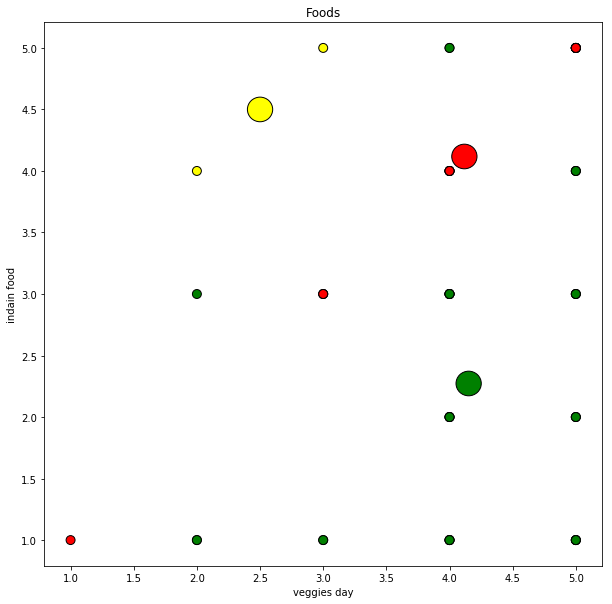

In [48]:
centroid1 = Dendrogram_data[Dendrogram_data.Association == 1][["veggies_day", "indian_food"]].mean()
centroid2 = Dendrogram_data[Dendrogram_data.Association == 2][["veggies_day", "indian_food"]].mean()
centroid3 = Dendrogram_data[Dendrogram_data.Association == 3][["veggies_day", "indian_food"]].mean()

fig = plt.figure(figsize=(10,10))

# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
plt.scatter(Dendrogram_data.veggies_day, Dendrogram_data.indian_food, c=colormap[Dendrogram_data.Association], edgecolor = 'black', s = 80)

#plt.scatter(Dendrogram_data.fav_food,Dendrogram_data.pay_meal_out, edgecolor = 'black', s = 80)

plt.title('Foods')
plt.xlabel('veggies day')
plt.ylabel('indain food')
circle1 = plt.Circle(centroid1, radius=0.1, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.1, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.1, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

The central point has moved based on the mean value. 


#### Third iteration


/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

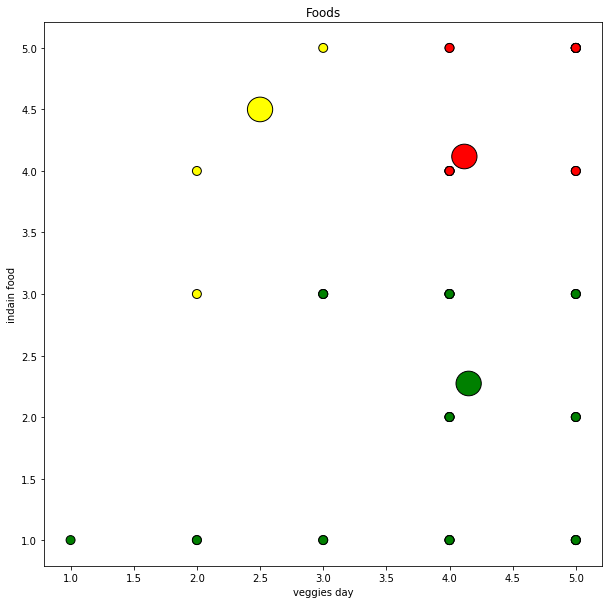

In [49]:
Dendrogram_data["Dist_C1"] = np.sqrt((Dendrogram_data.veggies_day - centroid1[0])**2 + (Dendrogram_data.indian_food - centroid1[1])**2)
Dendrogram_data["Dist_C2"] = np.sqrt((Dendrogram_data.veggies_day - centroid2[0])**2 + (Dendrogram_data.indian_food- centroid2[1])**2)
Dendrogram_data["Dist_C3"] = np.sqrt((Dendrogram_data.veggies_day - centroid3[0])**2 + (Dendrogram_data.indian_food - centroid3[1])**2)
Dendrogram_data["Association"] = np.where((Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C2) & 
                                  (Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C3), 1, 
                                   np.where((Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C1) & 
                                  (Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(10,10))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
# Plot Sepal
plt.scatter(Dendrogram_data.veggies_day,Dendrogram_data.indian_food, c=colormap[Dendrogram_data.Association], edgecolor = 'black', s = 80)
plt.title('Foods')
plt.xlabel('veggies day')
plt.ylabel('indain food')
circle1 = plt.Circle(centroid1, radius=0.1, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.1, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.1, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)


#### Fourth iteration

/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

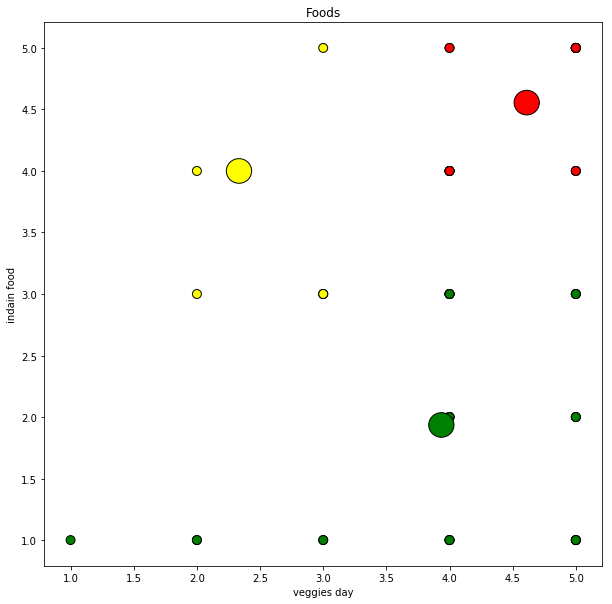

In [50]:
centroid1 = Dendrogram_data[Dendrogram_data.Association == 1][["veggies_day", "indian_food"]].mean()
centroid2 = Dendrogram_data[Dendrogram_data.Association == 2][["veggies_day", "indian_food"]].mean()
centroid3 = Dendrogram_data[Dendrogram_data.Association == 3][["veggies_day", "indian_food"]].mean()
Dendrogram_data["Dist_C1"] = np.sqrt((Dendrogram_data.veggies_day - centroid1[0])**2 + (Dendrogram_data.indian_food - centroid1[1])**2)
Dendrogram_data["Dist_C2"] = np.sqrt((Dendrogram_data.veggies_day - centroid2[0])**2 + (Dendrogram_data.indian_food - centroid2[1])**2)
Dendrogram_data["Dist_C3"] = np.sqrt((Dendrogram_data.veggies_day - centroid3[0])**2 + (Dendrogram_data.indian_food - centroid3[1])**2)
Dendrogram_data["Association"] = np.where((Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C2) & 
                                  (Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C3), 1, 
                                   np.where((Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C1) & 
                                  (Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(10,10))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
# Plot Sepal
plt.scatter(Dendrogram_data.veggies_day, Dendrogram_data.indian_food, c=colormap[Dendrogram_data.Association], edgecolor = 'black', s = 80)
plt.title('Foods')
plt.xlabel('veggies day')
plt.ylabel('indain food')
circle1 = plt.Circle(centroid1, radius=0.1, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.1, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.1, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

#### Fifth iteration


/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

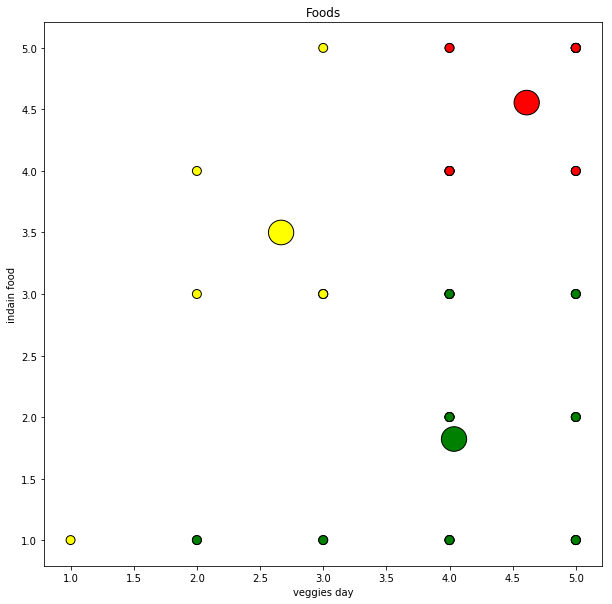

In [51]:
centroid1 = Dendrogram_data[Dendrogram_data.Association == 1][["veggies_day", "indian_food"]].mean()
centroid2 = Dendrogram_data[Dendrogram_data.Association == 2][["veggies_day", "indian_food"]].mean()
centroid3 = Dendrogram_data[Dendrogram_data.Association == 3][["veggies_day", "indian_food"]].mean()
Dendrogram_data["Dist_C1"] = np.sqrt((Dendrogram_data.veggies_day - centroid1[0])**2 + (Dendrogram_data.indian_food - centroid1[1])**2)
Dendrogram_data["Dist_C2"] = np.sqrt((Dendrogram_data.veggies_day - centroid2[0])**2 + (Dendrogram_data.indian_food - centroid2[1])**2)
Dendrogram_data["Dist_C3"] = np.sqrt((Dendrogram_data.veggies_day - centroid3[0])**2 + (Dendrogram_data.indian_food - centroid3[1])**2)
Dendrogram_data["Association"] = np.where((Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C2) & 
                                  (Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C3), 1, 
                                   np.where((Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C1) & 
                                  (Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(10,10))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
# Plot Sepal
plt.scatter(Dendrogram_data.veggies_day, Dendrogram_data.indian_food, c=colormap[Dendrogram_data.Association], edgecolor = 'black', s = 80)
plt.title('Foods')
plt.xlabel('veggies day')
plt.ylabel('indain food')
circle1 = plt.Circle(centroid1, radius=0.1, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.1, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.1, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

#### Sixth iteration


/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Text(0, 0.5, 'indain food')

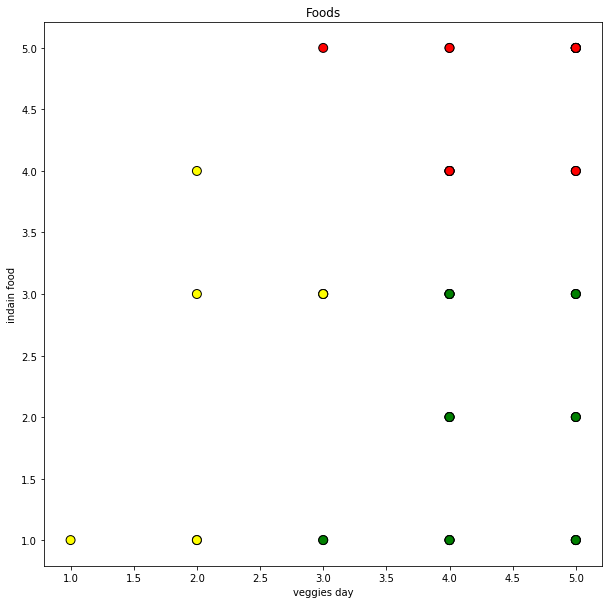

In [52]:
centroid1 = Dendrogram_data[Dendrogram_data.Association == 1][["veggies_day", "indian_food"]].mean()
centroid2 = Dendrogram_data[Dendrogram_data.Association == 2][["veggies_day", "indian_food"]].mean()
centroid3 = Dendrogram_data[Dendrogram_data.Association == 3][["veggies_day", "indian_food"]].mean()
Dendrogram_data["Dist_C1"] = np.sqrt((Dendrogram_data.veggies_day - centroid1[0])**2 + (Dendrogram_data.indian_food - centroid1[1])**2)
Dendrogram_data["Dist_C2"] = np.sqrt((Dendrogram_data.veggies_day - centroid2[0])**2 + (Dendrogram_data.indian_food - centroid2[1])**2)
Dendrogram_data["Dist_C3"] = np.sqrt((Dendrogram_data.veggies_day - centroid3[0])**2 + (Dendrogram_data.indian_food - centroid3[1])**2)
Dendrogram_data["Association"] = np.where((Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C2) & 
                                  (Dendrogram_data.Dist_C1 < Dendrogram_data.Dist_C3), 1, 
                                   np.where((Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C1) & 
                                  (Dendrogram_data.Dist_C2 < Dendrogram_data.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(10,10))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
# Plot Sepal
plt.scatter(Dendrogram_data.veggies_day, Dendrogram_data.indian_food, c=colormap[Dendrogram_data.Association], edgecolor = 'black', s = 80)
plt.title('Foods')
plt.xlabel('veggies day')
plt.ylabel('indain food')
#circle1 = plt.Circle(centroid1, radius=0.1, edgecolor = 'black', fc='yellow')
#circle2 = plt.Circle(centroid2, radius=0.1, edgecolor = 'black', fc='red')
#circle3 = plt.Circle(centroid3, radius=0.1, edgecolor = 'black', fc='green')
#plt.gca().add_patch(circle1)
#plt.gca().add_patch(circle2)
#plt.gca().add_patch(circle3)

# 5. sklearn.cluster:

In [54]:
df2 = df[['veggies_day','indian_food']]
df3 = df[['veggies_day','indian_food','weight']]

# K Means Cluster
model = KMeans(n_clusters = 3)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'indain food')

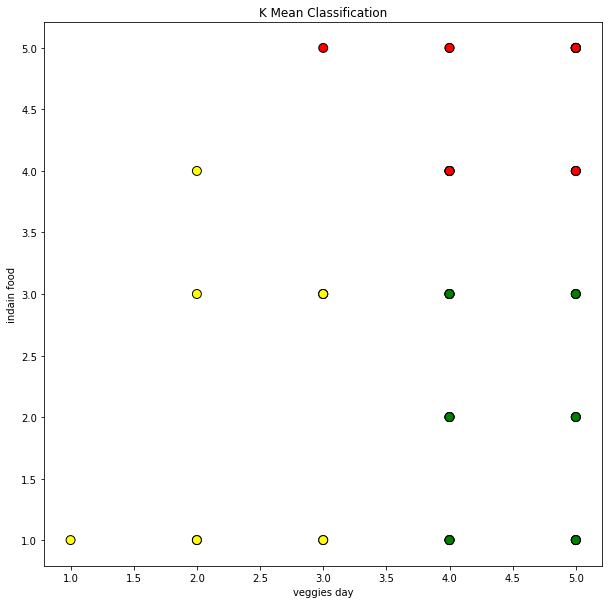

In [55]:
fig = plt.figure(figsize=(10, 10))
 
# Create a colormap
colormap = np.array(['green', 'red','yellow'])
 
plt.scatter(df2.veggies_day, df2.indian_food, c=colormap[model.labels_], edgecolor = 'black', s = 80)
plt.title('K Mean Classification')
plt.xlabel('veggies day')
plt.ylabel('indain food')

The above plot is made by using library which is almost similiar to plot produced by step by step K-means. 

# 7. 2D prediction mesh:

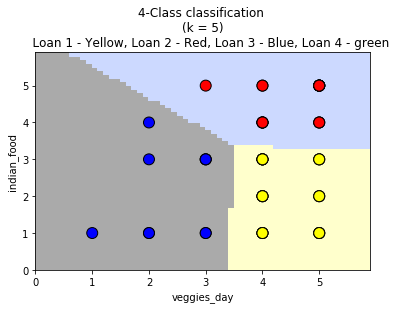

In [56]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

    x_min, x_max = df2.veggies_day.min() - 1, df2.veggies_day.max() + 1
    y_min, y_max = df2.indian_food.min() - 1, df2.indian_food.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(df2.veggies_day, df2.indian_food, c = colormap[model.labels_], edgecolor = 'black', s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification \n(k = %i)\n\
    Loan 1 - Yellow, Loan 2 - Red, Loan 3 - Blue, Loan 4 - green" % (5))
    plt.xlabel('veggies_day')
    plt.ylabel('indian_food')
    
plotMesh()

The above figure shows the prediction mesh for our model. The x-axis represents the veggies day and the y-axis represents the indian food. From the above plot, we will be able to find the veggies group who likes indian foods. 

# 6. Prediction

In [57]:
df3.head()

   veggies_day  indian_food  weight
1            4            4     155
2            5            5       0
4            4            2     190
6            4            5     180
7            4            1     137

In [58]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Prediction function 

In [23]:
def pred():
        colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

        veggies_day = float(input('veggies day: '))
        indian_food = float(input('indian_food: '))
        weight = float(input('weight: '))

        data_class = model.predict(np.array([veggies_day, indian_food,weight]).reshape(1,-1))[0]
        if colormap[data_class]=='yellow':
        #Student likes the veggie food too much. Based on the cluster, he probably likes the Indian food to
            print("  You will get $2 coupon ")
            
        if colormap[data_class]=='red':
        #Student does not like the veggie food too much. Based on the cluster, he probably does not likes the Indian food to
            print("  You will get $10 coupon ")   
            
        if colormap[data_class]=='blue':
        #Student likes the veggie food too much. Based on the cluster, he probably does not likes the Indian food to
            print("  You will get $5 coupon ") 
            
        

##### Prediction  1

In [24]:
pred()

veggies day: 2
indian_food: 2
weight: 145
  You will get $10 coupon 


##### Prediction  2


In [25]:
pred()

veggies day: 1
indian_food: 5
weight: 150
  You will get $2 coupon 


##### Prediction  3


In [26]:
pred()

veggies day: 4
indian_food: 1
weight: 130
  You will get $2 coupon 


##### Prediction  4


In [27]:
pred()

veggies day: 12
indian_food: 1
weight: 340
  You will get $10 coupon 


##### Prediction  5


In [28]:
pred()

veggies day: 2
indian_food: 5
weight: 176
  You will get $10 coupon 


##### Prediction  6


In [30]:
pred()

veggies day: 4
indian_food: 2
weight: 128
  You will get $2 coupon 


##### Prediction  7


In [25]:
pred()

veggies day: 3
indian_food: 2
weight: 146
  You will get $10 coupon 


##### Prediction  8

In [26]:
pred()

veggies day: 3
indian_food: 2
weight: 165
  You will get $2 coupon 


##### Prediction  9

In [27]:
pred()

veggies day: 5
indian_food: 1
weight: 176
  You will get $2 coupon 


##### Prediction  10

In [28]:
pred()

veggies day: 4
indian_food: 1
weight: 199
  You will get $2 coupon 


Explanation:

The model is able to perform predication based on clustering. If we want to send coupon for specific groups, it is possible to identfy them. 



# 10. Summary:

The analysis of dataset represents a good insight of food habit of University student. The dataset is not reliable by size. Also, it has a lot of missing data. Therefore, the chance to get almost optimal solution for small projects is little.


Several analyses are possible by the dataset. Also, there are many ways to build recommendation engine for sending coupon to students. In our case, we want to find correlation between veggie student to Indian foods, and weight. As we know that most of the Indian cosines are veggie so that veggie people may like Indian foods more. Therefore, we have built recommendation engine for the specific Indian food. It is also possible to cope other columns and include into our model. But that is out of our scope.


Recommendations: UOP cafeteria could send email based on the following criterion:<br>
a. \\$10 coupon: For those who does not like veggie food. Therefore, they may be interested to eat Indian food.<br> 
b. \\$5 coupon: For those who moderately like veggie food. If they get the coupon, they will be more interested to buy the Indian food. <br>
c. \\$2 coupon: For those who like veggie food. It does not matter that they have coupon or not. They will buy Indian food. But if they receive food, they will get more motivated.

